In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
import os
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from collections import defaultdict

In [3]:
path='C:\\Users\\kurt_\\Dropbox\\code\\ulku\\Capstone2\\'
df=pd.read_csv(path+'step1.csv')
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
uniqueID,160398.0,115957.147309,67015.899492,2.0,58065.25,115845.5,173826.75,232291.0
rating,160398.0,6.995923,3.272303,1.0,5.00,8.0,10.00,10.0
usefulCount,160398.0,28.097613,36.457876,0.0,6.00,16.0,36.00,1291.0


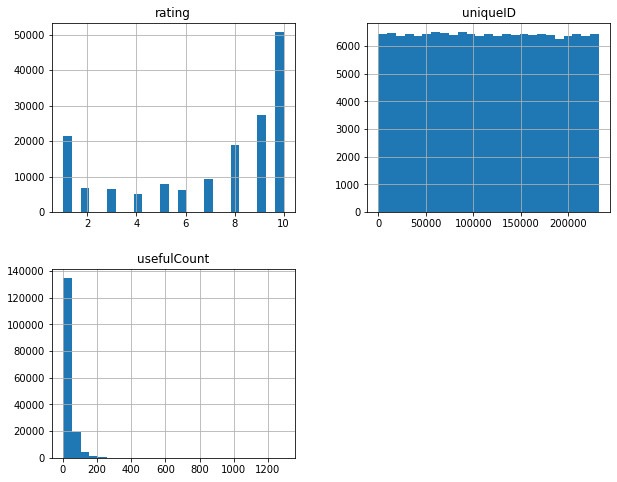

In [7]:
hist = df.hist(bins=25, figsize =(10,8))

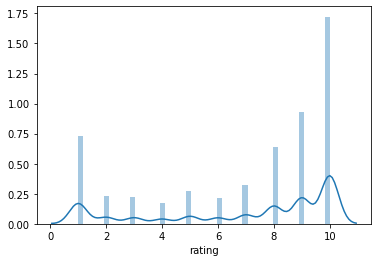

In [9]:
sns.distplot(df['rating'])

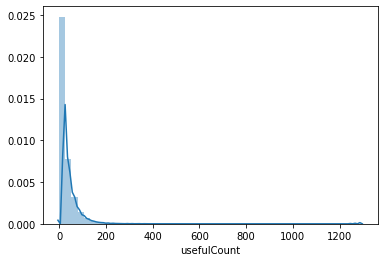

In [46]:
sns.distplot(df['usefulCount'])

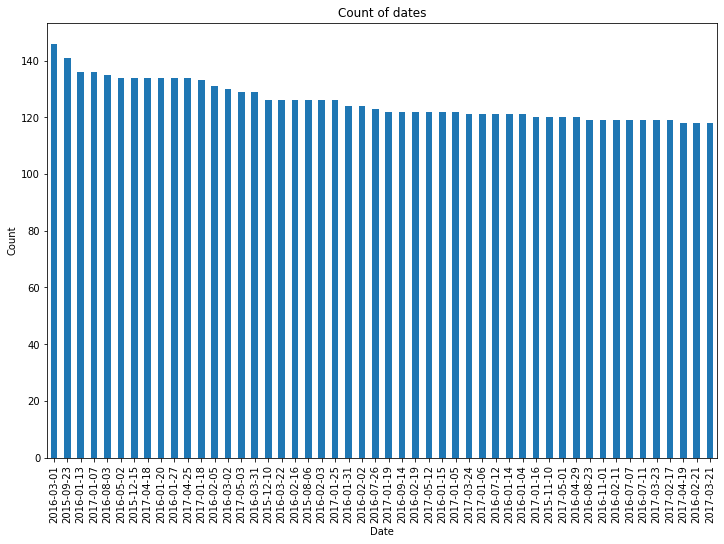

In [51]:
df['date'].value_counts()[:50].plot(kind='bar', figsize=(12, 8))
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count of dates')
plt.show()
plt.close()

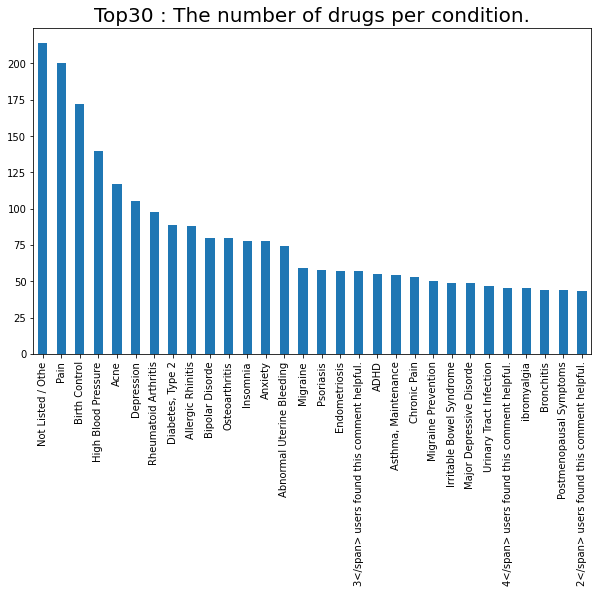

In [14]:
con_drug_grp = df.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
con_drug_grp[0:30].plot(kind="bar", figsize=(10, 6))
plt.xlabel("", fontsize = 30)
plt.ylabel("", fontsize = 30)
plt.title("Top30 : The number of drugs per condition.", fontsize = 20)
plt.show()
plt.close()

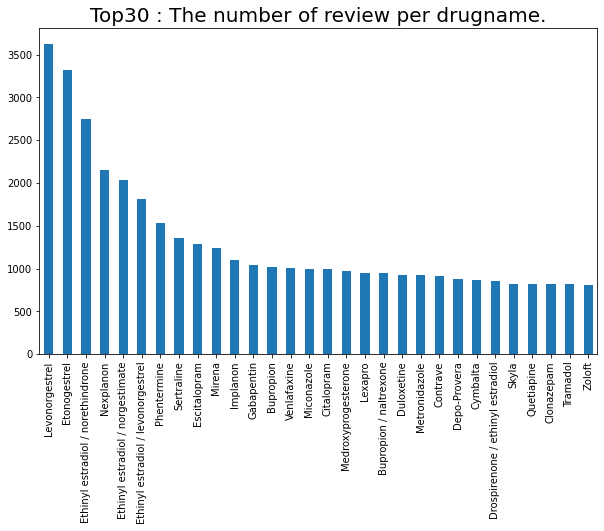

In [16]:
drug_rev_grp = df.groupby(['drugName'])['review'].nunique().sort_values(ascending=False)
drug_rev_grp[0:30].plot(kind="bar", figsize=(10, 6))
plt.xlabel("", fontsize = 30)
plt.ylabel("", fontsize = 30)
plt.title("Top30 : The number of review per drugname.", fontsize = 20)
plt.show()
plt.close()

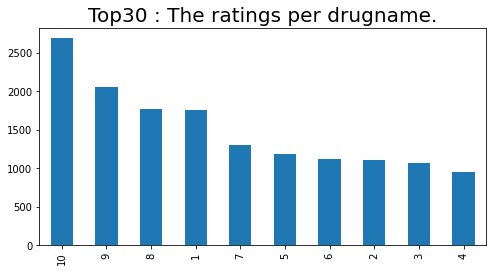

In [21]:
usf_rev_grp = df.groupby(['rating'])['drugName'].nunique().sort_values(ascending=False)
usf_rev_grp[0:50].plot(kind="bar", figsize=(8, 4))
plt.xlabel("", fontsize = 30)
plt.ylabel("", fontsize = 30)
plt.title("Top30 : The ratings per drugname.", fontsize = 20)
plt.show()
plt.close()

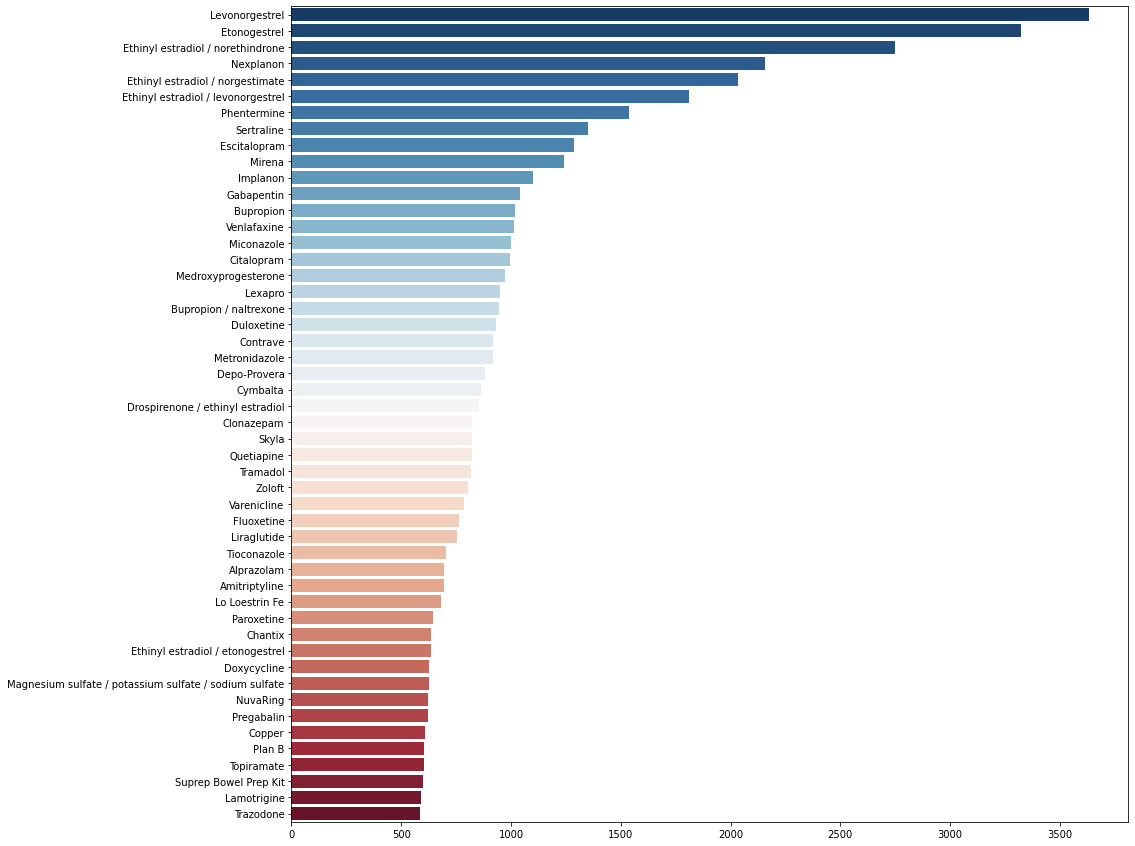

In [33]:
f, ax = plt.subplots(figsize=(15, 15))
x = pd.DataFrame(df.drugName.value_counts())
names = list(x.drugName)
values = list(x.index)
sns.barplot(x=names[:50], y=values[:50], palette="RdBu_r")

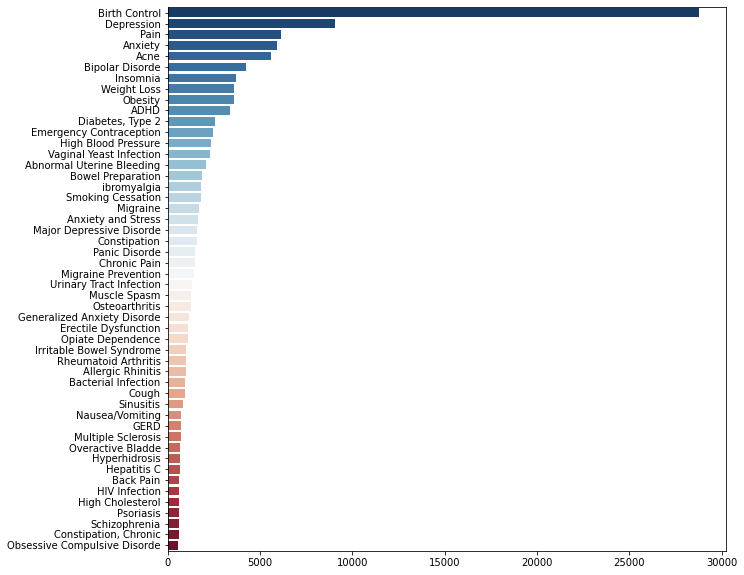

In [38]:
f, ax = plt.subplots(figsize=(10, 10))
z = pd.DataFrame(df.condition.value_counts())
names = list(z.condition)
values = list(z.index)
sns.barplot(x=names[:50], y=values[:50], palette="RdBu_r")
sns.barplot(x=names[:50], y=values[:50], palette="RdBu_r")

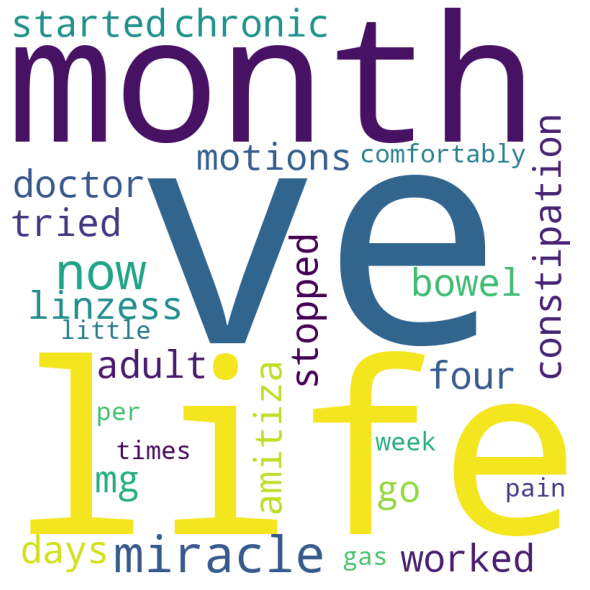

In [39]:
comment_words = ' '
stopwords = set(STOPWORDS) 

for val in df.review: 

   # typecaste each val to string 
   val = str(val) 

   # split the value 
   tokens = val.split() 

# Converts each token into lowercase 
for i in range(len(tokens)): 
    tokens[i] = tokens[i].lower() 
for words in tokens: 
    comment_words = comment_words + words + ' '


wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords, 
            min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()
plt.close()

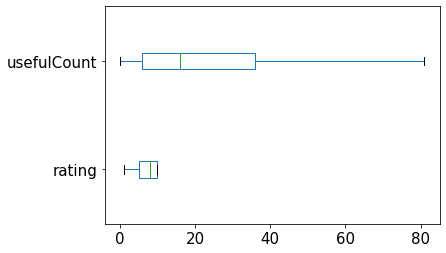

In [40]:
df_outliers=df.boxplot(column=['rating', 'usefulCount'], showfliers=False, grid=False, vert=False,fontsize=15)
df_outliers

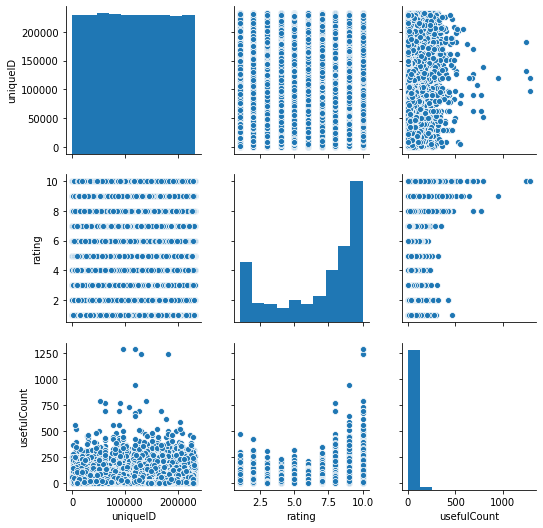

In [41]:
df_=sns.pairplot(df)
df_

In [57]:
#list of punctuation marks
punct_=string.punctuation
#list of stopwords
nlp=spacy.load('en')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

#Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

#Creating tokenizer function
def tok_func(sentence):
    
    #Create token object
    token_ = parser(sentence)
    
    # Lemmatize each token and convert each token into lowercase
    token_ = [word.lemma_.lower().strip() if word.lemma_!="-PRON-" else word.lower_ for word in token_]
    
    #Remove stop words
    token_ = [word for word in token_ if word not in stop_words and word not in punct_]
    
    # return preprocessed list of tokens
    return token_

In [56]:
# Custom transformer using spaCy
from sklearn.base import TransformerMixin
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Basic function to clean the text
def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower()

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vector = CountVectorizer(tokenizer = tok_func, ngram_range=(1,1))

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vector = TfidfVectorizer(tokenizer = tok_func)